In [16]:
from __future__ import print_function
import sys,os,datetime
import cv2 as cv
import cv2 as cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
import sklearn.metrics as skm
import csv

In [2]:
print('openCV',cv.__version__)
print('numpy',np.__version__)

openCV 3.2.0
numpy 1.13.3


In [251]:
dirTrain = '../Data/train/train/level-1'
#dirTrain = '../Data/train/train/level-2'
#dirTrain = '../Data/train/train/level-3'
dirDev   = '../Data/dev/dev'

In [252]:
listTrain= os.listdir(dirTrain); len(listTrain); listTrain[:12]
listTrainNN = []
for ff in listTrain :
    if ff.lower().endswith('.txt') : listTrainNN.append(ff.split('_')[0])
len(listTrainNN), listTrainNN[:15]

(751,
 ['1014',
  '1016',
  '1040',
  '962',
  '971',
  '97',
  '980',
  '992',
  '919',
  '93',
  '942',
  '953',
  '961',
  '4292',
  '42'])

In [253]:
def computeORB (img, debug=False) :
    orb    = cv2.ORB_create();
    kp     = orb.detect(img,None)
    kp,des = orb.compute(img,kp)
    if debug :
        print (len(kp))
        print (len(des),len(des[0]),"\n",des[0],"\n",des[1])
    return kp,des

def computeMatches (des1,des2) :
    if True :
        bf      = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
        matches = bf.match(des1,des2);
        #????matches = bf.knnMatch(des1,des2,k=1);
    if False :
        index_params = dict(algorithm = 6, #cv2.FLANN_INDEX_LSH,
                            table_number = 6, 
                            key_size = 12,    
                            multi_probe_level = 1)
        search_params = dict(checks=100)
        flann   = cv2.FlannBasedMatcher(index_params,search_params)
        matchesI = flann.knnMatch(des1,des2,k=3);
        matches  = [];
        for mI in matchesI :
            for m in mI : matches.append(m);
    return matches    

def drawMatches(img1,kp1,des1,img2,kp2,des2, show=False, showNN=20):
    matches = computeMatches(des1,des2);
    matches = sorted(matches,key=lambda x:x.distance)
    if  show :
        imgM    = img1.copy()
        #imgM    = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],imgM,flags=4)
        imgM    = cv2.drawMatches(img1,kp1,img2,kp2,matches[:showNN],imgM,flags=2) #4)
        #imgM    = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,imgM,flags=2) #4)
        
        plt.figure(figsize=(15,15)); plt.imshow(imgM), plt.show()
    return(matches)


In [254]:

NN=19
print(os.path.join(dirTrain,'level-1',listTrainNN[NN]+'.tif'))
img1 = cv.imread(os.path.join(dirTrain,'level-1',listTrainNN[NN]+'.tif'),-1)
img2 = cv.imread(os.path.join(dirTrain,'level-1',listTrainNN[NN]+'_ref.tif'),-1)


../Data/train/train/level-1/level-1/246.tif


In [255]:
img1      = cv.GaussianBlur(img1,(3,3),0)
img2      = cv.GaussianBlur(img2,(3,3),0)
kp1, des1 = computeORB(img1)
kp2, des2 = computeORB(img2)

print(len(kp1), len(kp2))
plt.imshow(img1); plt.show()
plt.imshow(img2); plt.show()

matches = drawMatches(img1,kp1,des1, img2,kp2,des2, show=True)
#drawMatches(img2,kp2,des2, img1,kp1,des1, show=True)

print(len(kp1), len(kp2), len(matches))
for mm in matches[:20] : print(mm.distance)


error: /io/opencv/modules/core/src/matrix.cpp:949: error: (-215) dims <= 2 && step[0] > 0 in function locateROI


In [256]:

NN=12
res = []
#print(os.path.join(dirTrain,'level-1',listTrainNN[NN]+'.tif'))
for NN in range(len(listTrainNN)) :
    #print(NN)
    img1 = cv.imread(os.path.join(dirTrain,listTrainNN[NN]+'.tif'),-1)
    img2 = cv.imread(os.path.join(dirTrain,listTrainNN[NN]+'_ref.tif'),-1)
    #img1      = cv.GaussianBlur(img1,(3,3),0)
    #img2      = cv.GaussianBlur(img2,(3,3),0)
    kp1, des1 = computeORB(img1)
    kp2, des2 = computeORB(img2)
    matches = []
    if len(kp1)>0 and len(kp2)>0 :
        matches = drawMatches(img1,kp1,des1, img2,kp2,des2, show=False)
    res.append([len(kp1),len(kp2),len(matches),
                (matches[0].distance if len(matches)>0 else -1),
                (matches[-1].distance if len(matches)>0 else -1)])


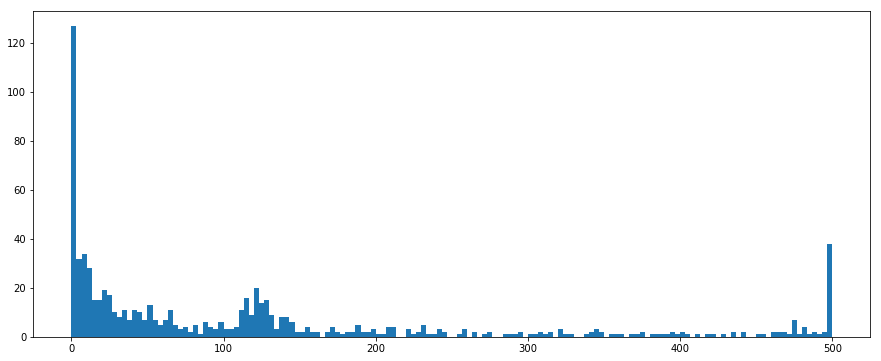

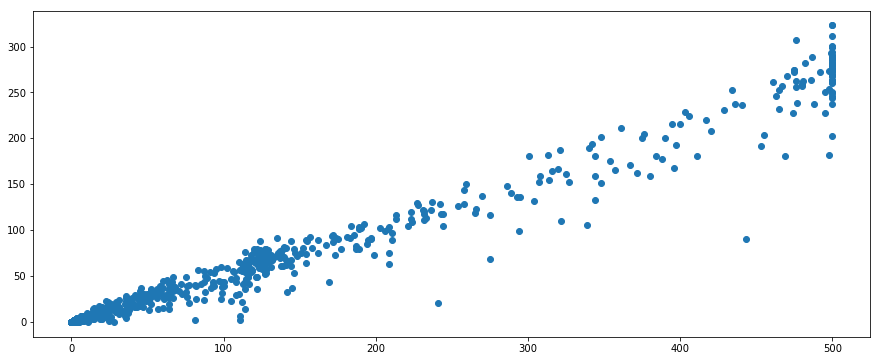

In [257]:
plt.figure(figsize=(15,6));
plt.hist([k2 for k1,k2,mm,mm0,mmM in res],bins=150); plt.show()
plt.figure(figsize=(15,6));
plt.scatter([k2 for k1,k2,mm,mm0,mmM in res],[mm for k1,k2,mm,mm0,mmM in res]); plt.show()

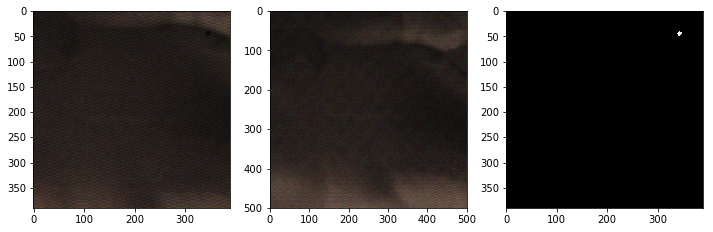

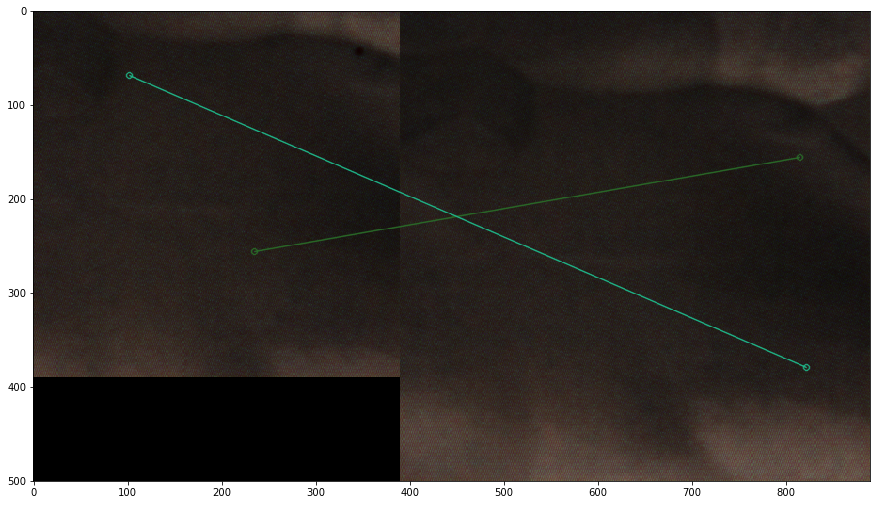

5 2 2 27.914852071 30.30236
Not enough matches are found - 2/6


In [273]:
NN = 170
img1 = cv.imread(os.path.join(dirTrain,listTrainNN[NN]+'.tif'),-1)
img2 = cv.imread(os.path.join(dirTrain,listTrainNN[NN]+'_ref.tif'),-1)
img3 = cv.imread(os.path.join(dirTrain,listTrainNN[NN]+'_mask.tif'),-1)
#img1[:,:,1] = 0
#img2[:,:,1] = 0

#img1      = cv.GaussianBlur(img1,(3,3),0)
#img2      = cv.GaussianBlur(img2,(3,3),0)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1); plt.imshow(img1);
plt.subplot(1,3,2); plt.imshow(img2);
plt.subplot(1,3,3); plt.imshow(img3,'gray'); 
plt.show()

if True :
    kp1, des1 = computeORB(img1)
    kp2, des2 = computeORB(img2)
    matches = []
    if len(kp1)>0 and len(kp2)>0 :
        matches = drawMatches(img1,kp1,des1, img2,kp2,des2, show=True, showNN=50)
        good = matches
        print(len(kp1),len(kp2),len(matches),img1[:,:,2].mean(),img2[:,:,2].mean())
        MIN_MATCH_COUNT = 6
        if True and len(good)>MIN_MATCH_COUNT:
            src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
            dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
            matchesMask = mask.ravel().tolist()

            h,w,c = img1.shape
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)

            img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
            
            plt.imshow(img2); plt.show()

        else:
            print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
            matchesMask = None
    else:
        print(len(kp1),len(kp2),img1[:,:,2].mean(),img2[:,:,2].mean())


In [212]:
img1.shape

(390, 390, 3)